## Importing Libraries

In [ ]:
# data processing, modeling and visualization
import numpy as np
import pandas as pd
from prophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt
# multi - processing
from multiprocessing import Pool, cpu_count
# progres bar
from tqdm import tqdm
# tracking time
from time import time

## Loading the combined dataset

In [ ]:
df = pd.read_excel("datasets/Combined.xlsx").set_index("State")

In [ ]:
df.head(60)

,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
State,,,,,,,,,,,,,,,,,,,,,
United States,64.5,63.9,63.8,64.0,63.8,63.9,63.9,64.1,64.1,64.0,...,65.4,65.1,64.5,63.7,63.4,63.9,64.4,64.6,66.6,65.5
Alabama,73.7,70.4,70.3,67.9,66.5,67.6,68.4,69.9,70.3,70.2,...,71.9,72.7,72.1,70.0,69.7,70.0,70.3,70.7,74.8,73.4
Alaska,57.6,61.2,61.5,59.7,57.0,58.7,58.4,57.1,55.5,55.4,...,63.7,64.6,64.9,62.3,65.2,65.5,63.7,62.6,64.1,64.0
Arizona,65.2,64.7,62.5,63.3,66.1,63.9,64.5,66.3,69.3,69.1,...,65.3,65.1,63.5,61.7,61.9,64.4,65.7,65.8,68.7,65.2
Arkansas,65.9,66.6,67.5,68.1,67.0,66.3,67.8,68.6,70.3,70.5,...,66.0,65.4,65.4,67.1,67.6,65.0,64.7,65.3,68.8,66.1
California,53.7,54.2,53.8,54.3,54.4,53.6,53.8,54.5,55.3,56.0,...,54.5,54.3,54.2,54.3,53.8,54.4,55.1,54.8,55.9,54.2
Colorado,64.7,63.6,63.7,61.8,60.1,58.6,59.0,59.8,60.9,61.8,...,65.3,64.4,65.0,63.6,62.4,63.7,64.4,64.7,64.9,65.9
Connecticut,67.8,69.0,68.1,67.0,66.5,66.4,67.9,65.5,66.1,64.5,...,68.8,68.5,67.4,66.5,64.2,66.1,65.3,64.3,66.9,66.1
Delaware,70.4,70.3,71.0,71.1,70.1,68.7,67.7,70.2,73.8,74.1,...,73.4,74.1,74.3,73.3,73.0,70.0,70.8,73.1,77.9,73.5


In [ ]:
# deleting data for 1984 to account for presedential season [4 years] starting from 1985 onwards
# df = df.drop(1984, axis = 1)

In [ ]:
# df_test = df[[2014,2015,2016, 2017, 2018, 2019, 2020, 2021]]
# df_test

In [ ]:
# df_train = df.drop([2014,2015,2016, 2017, 2018, 2019, 2020, 2021], axis = 1)
# df_train

## Data Processing

### Performing a transpose operation on the dataset to have year in column

In [ ]:
# df.info()
# df_train.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, United States to Wyoming                 
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1984    52 non-null     float64
 1   1985    52 non-null     float64
 2   1986    52 non-null     float64
 3   1987    52 non-null     float64
 4   1988    52 non-null     float64
 5   1989    52 non-null     float64
 6   1990    52 non-null     float64
 7   1991    52 non-null     float64
 8   1992    52 non-null     float64
 9   1993    52 non-null     float64
 10  1994    52 non-null     float64
 11  1995    52 non-null     float64
 12  1996    52 non-null     float64
 13  1997    52 non-null     float64
 14  1998    52 non-null     float64
 15  1999    52 non-null     float64
 16  2000    52 non-null     float64
 17  2001    52 non-null     float64
 18  2002    52 non-null     float64
 19  2003    52 non-null     float64
 20  2004    52 non-null     float64
 21  2005    52 n

In [ ]:
# df_t = df_train.T
df_t = df.T
df_t.index.name = 'Year'
df_t.head()

State,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1984,64.5,73.7,57.6,65.2,65.9,53.7,64.7,67.8,70.4,37.3,...,69.6,67.6,62.5,69.9,66.9,68.3,65.7,72.0,65.2,68.8
1985,63.9,70.4,61.2,64.7,66.6,54.2,63.6,69.0,70.3,37.4,...,67.6,67.6,60.5,71.5,69.5,68.5,66.8,75.9,63.8,73.2
1986,63.8,70.3,61.5,62.5,67.5,53.8,63.7,68.1,71.0,34.6,...,65.9,67.4,61.0,68.0,69.8,68.2,65.1,76.4,66.5,72.0
1987,64.0,67.9,59.7,63.3,68.1,54.3,61.8,67.0,71.1,35.8,...,66.8,67.2,61.1,69.0,70.5,69.0,64.4,72.5,68.2,68.9
1988,63.8,66.5,57.0,66.1,67.0,54.4,60.1,66.5,70.1,37.5,...,66.4,66.9,59.9,70.2,68.7,69.8,64.2,73.2,68.0,67.8


### Striping white spaces from column names

In [ ]:
df_t.columns

Index(['United States', 'Alabama                  ',
       'Alaska                     ', 'Arizona                    ',
       'Arkansas                 ', 'California                 ',
       'Colorado                 ', 'Connecticut              ',
       'Delaware                 ', 'District of Columbia  ',
       'Florida                     ', 'Georgia                   ',
       'Hawaii                     ', 'Idaho                       ',
       'Illinois                      ', 'Indiana                    ',
       'Iowa                        ', 'Kansas                    ',
       'Kentucky                 ', 'Louisiana                 ',
       'Maine                      ', 'Maryland                 ',
       'Massachusetts         ', 'Michigan                  ',
       'Minnesota                ', 'Mississippi               ',
       'Missouri                   ', 'Montana                  ',
       'Nebraska                 ', 'Nevada                    ',
       'N

In [ ]:
df_t.columns = df_t.columns.str.rstrip()

In [ ]:
df_t.columns

Index(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='State')

### Transforming the data in the Prophet input format

In [ ]:
df_t = df_t.reset_index()
df_t = pd.melt(df_t, id_vars = 'Year', value_vars = df_t.columns)
df_t.columns = ['ds', 'State', 'y']
df_t.head()

,ds,State,y
0,1984,United States,64.5
1,1985,United States,63.9
2,1986,United States,63.8
3,1987,United States,64.0
4,1988,United States,63.8


In [ ]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1976 non-null   int64  
 1   State   1976 non-null   object 
 2   y       1976 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 46.4+ KB


In [ ]:
# df_t['ds'] = pd.to_datetime(df_t['ds'].astype('str'), format = '%y')
df_t.ds = pd.to_datetime(df_t.ds, format = '%Y')

In [ ]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1976 non-null   datetime64[ns]
 1   State   1976 non-null   object        
 2   y       1976 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 46.4+ KB


In [ ]:
df_t.head()

,ds,State,y
0,1984-01-01,United States,64.5
1,1985-01-01,United States,63.9
2,1986-01-01,United States,63.8
3,1987-01-01,United States,64.0
4,1988-01-01,United States,63.8


## Group the data by States

In [ ]:
# Group the data by State
group_by_state = df_t.groupby('State')
# Check the groups in the dataframe
group_by_state.groups.keys()

dict_keys(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'United States', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'])

## Training

In [ ]:
def train_forecast(group):
  # Initiate the model
  m = Prophet(seasonality_mode='additive',
              seasonality_prior_scale=10,
              yearly_seasonality=False,
              weekly_seasonality=False,
              daily_seasonality=False)
  
  m.add_seasonality(name = 'presidential', period = 4, fourier_order=4)
  # Fit the model
  m.fit(group)
  # Make predictions
  future = m.make_future_dataframe(periods = 4, freq = 'A')
  forecast = m.predict(future)[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]
  forecast['State'] = group['State'].iloc[0]
  # Return the forecasted results
  return forecast[['ds', 'State', 'yhat', 'yhat_upper', 'yhat_lower']]

## Forecasting

In [ ]:
# Start Time
start_time = time()

# create an empty dataframe
for_loop_forecast = pd.DataFrame()

# Loop through each state
for state in group_by_state.groups.keys():
  # Get data for the state
  group = group_by_state.get_group(state)
  # Make forecast
  forecast = train_forecast(group)
  # Add the forecast results to the dataframe
  for_loop_forecast = pd.concat((for_loop_forecast, forecast))

print('The Time used for the for - loop forecast is: ', time() - start_time)

# Take a look at the data
for_loop_forecast.head()

DEBUG:cmdstanpy:input tempfile: /tmp/tmprbt9ndy5/8zh8jx83.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbt9ndy5/1aj4snj8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64120', 'data', 'file=/tmp/tmprbt9ndy5/8zh8jx83.json', 'init=/tmp/tmprbt9ndy5/1aj4snj8.json', 'output', 'file=/tmp/tmprbt9ndy5/prophet_modeljrgq17rk/prophet_model-20230426214633.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:46:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:46:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbt9ndy5/ztjzcrz_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbt9ndy5/_1tc68we.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

The Time used for the for - loop forecast is:  32.38647961616516


,ds,State,yhat,yhat_upper,yhat_lower
0,1984-01-01,Alabama,68.714555,71.092258,66.394898
1,1985-01-01,Alabama,68.524993,70.916080,66.230004
2,1986-01-01,Alabama,69.128628,71.530955,66.730699
3,1987-01-01,Alabama,69.525075,71.870099,66.898910
4,1988-01-01,Alabama,69.611354,71.875541,67.142678


In [ ]:
for_loop_forecast.head(60)

,ds,State,yhat,yhat_upper,yhat_lower
0,1984-01-01,Alabama,68.714555,71.092258,66.394898
1,1985-01-01,Alabama,68.524993,70.916080,66.230004
2,1986-01-01,Alabama,69.128628,71.530955,66.730699
3,1987-01-01,Alabama,69.525075,71.870099,66.898910
4,1988-01-01,Alabama,69.611354,71.875541,67.142678
5,1989-01-01,Alabama,69.939531,72.469330,67.624890
6,1990-01-01,Alabama,70.336704,72.850689,67.867014
7,1991-01-01,Alabama,70.427306,72.614902,68.114218
8,1992-01-01,Alabama,70.426488,72.781372,67.966218
9,1993-01-01,Alabama,71.163815,73.696273,68.612916


## Validation

### Preparing the test data

In [ ]:
# df_test.head()

In [ ]:
# df_test = df_test.T
# df_test.index.name = 'Year'
# df_test.head()

In [ ]:
# df_test.columns = df_test.columns.str.rstrip()

In [ ]:
# df_test = df_test.reset_index()
# df_test = pd.melt(df_test, id_vars = 'Year', value_vars = df_test.columns)
# df_test.head()

In [ ]:
# df_test.Year = pd.to_datetime(df_test.Year, format = '%Y')
# df_test.info()

In [ ]:
# df_test

## Plotting the Results

### Ploting function

In [ ]:
import matplotlib.pyplot as plt
def plot(comparison_entity = 'United States', states_list = [], figsize = (20, 10)):
  # plot the US national homeowner rates
  plt.figure(figsize = figsize)
  x = list(for_loop_forecast[for_loop_forecast['State'] == comparison_entity]['ds'])
  y_hat = for_loop_forecast[for_loop_forecast['State'] == comparison_entity]['yhat'].values
  y_hat_l = for_loop_forecast[for_loop_forecast['State'] == comparison_entity]['yhat_lower'].values
  y_hat_u = for_loop_forecast[for_loop_forecast['State'] == comparison_entity]['yhat_upper'].values
  y_train = list(df_t[df_t['State'] == comparison_entity]['y'])
  # y_test = list(df_test[df_test['State'] == country_name]['value'])
  # y_test = [None]*len(y_train) + y_test
  # y_true.extend([y_true[-1], y_true[-1], y_true[-1], y_true[-1], y_true[-1]])
  y_train.extend([None]*4)
  plt.xlabel('Year')
  plt.ylabel('Home Ownership Rate')
  plt.title(f"{comparison_entity} vs State Home Ownership Rates")
  plt.fill_between(x, y_hat_l, y_hat_u, color = 'lightgray', alpha = 0.5)
  plt.plot(x, y_hat, lw = 3, color = 'black', label = f'{comparison_entity} (Predicted)')
  plt.plot(x, y_train, lw = 3,color = 'red', label = f'{comparison_entity} (Actual)')
  # plt.plot(x, y_test, lw = 3, color = 'blue', label = 'test')

  #plot the states' data
  for i in range(len(states_list)):
    y_train = list(df_t[df_t['State'] == states_list[i]]['y'])
    y_train.extend([None]*4)
    plt.plot(x, y_train, lw = 3, label = states_list[i], linestyle = 'dotted', marker = 'o')

  plt.grid()
  plt.legend()
  plt.show()    

### Set 1 - West Coast

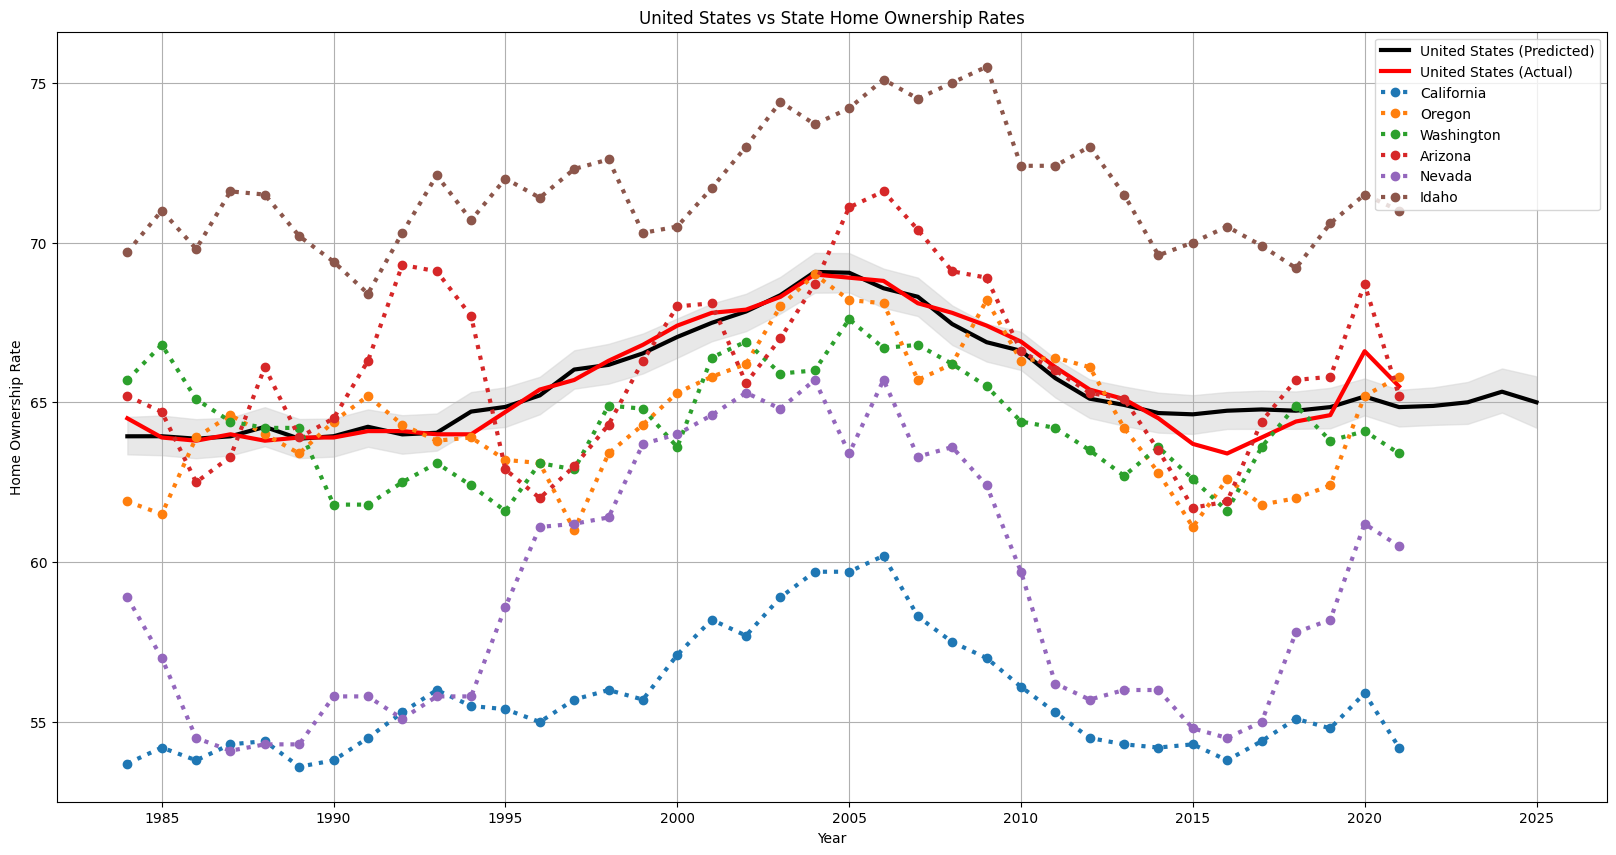

In [ ]:
plot(comparison_entity = 'United States',states_list = ['California', 'Oregon', 'Washington', 'Arizona', 'Nevada', 'Idaho'], figsize = (20, 10))

### Set 2 - Mid West

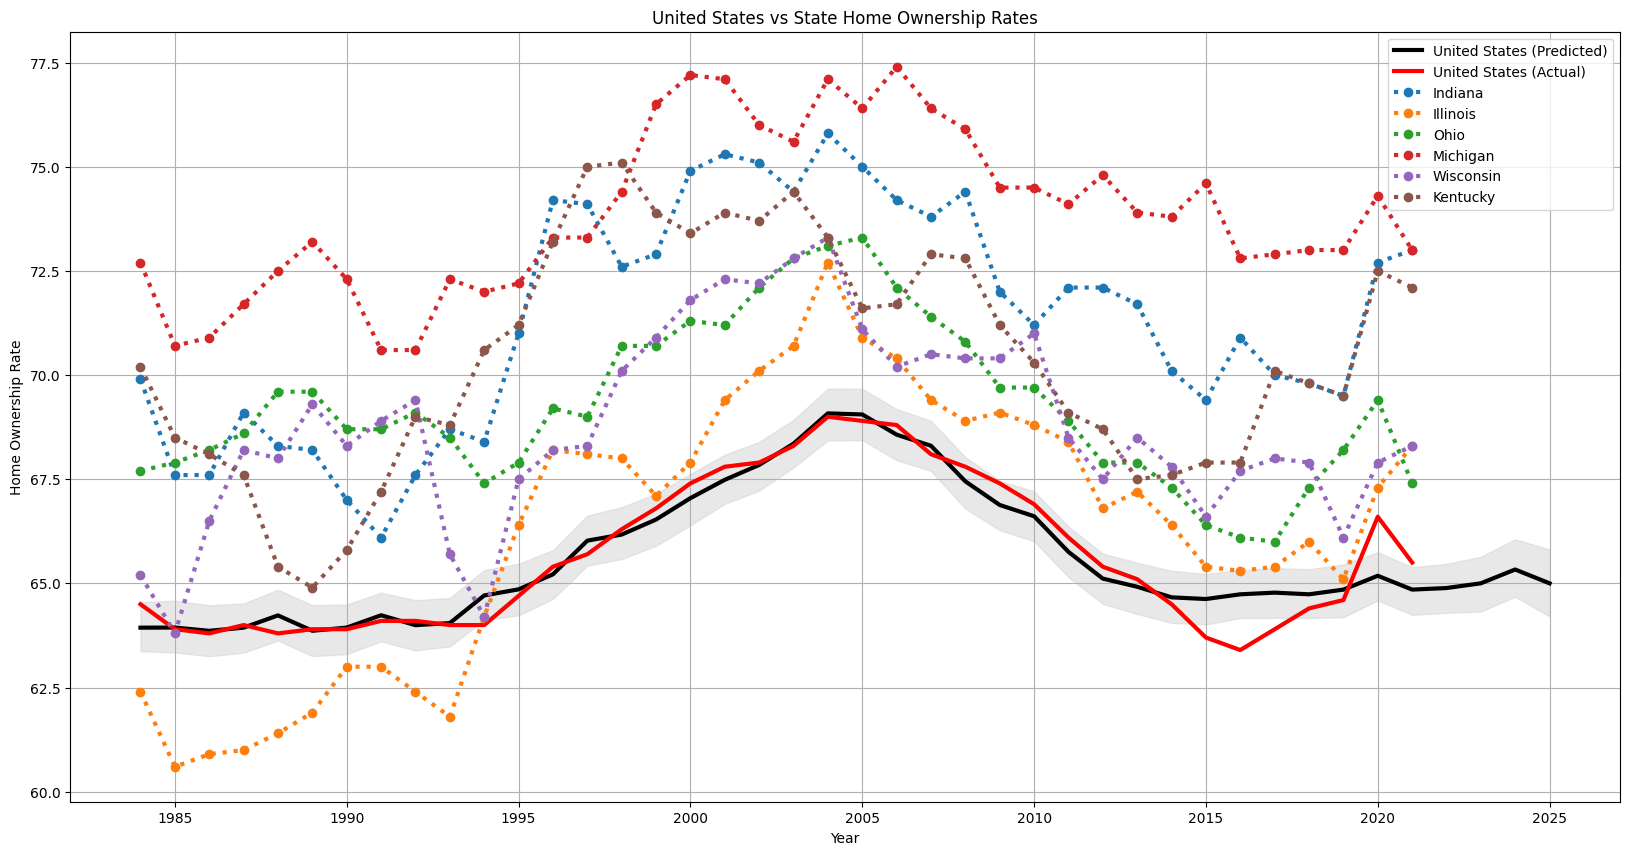

In [ ]:
plot(comparison_entity = 'United States',states_list = ['Indiana', 'Illinois', 'Ohio', 'Michigan', 'Wisconsin', 'Kentucky'], figsize = (20, 10))

### Set 3 - Southern States

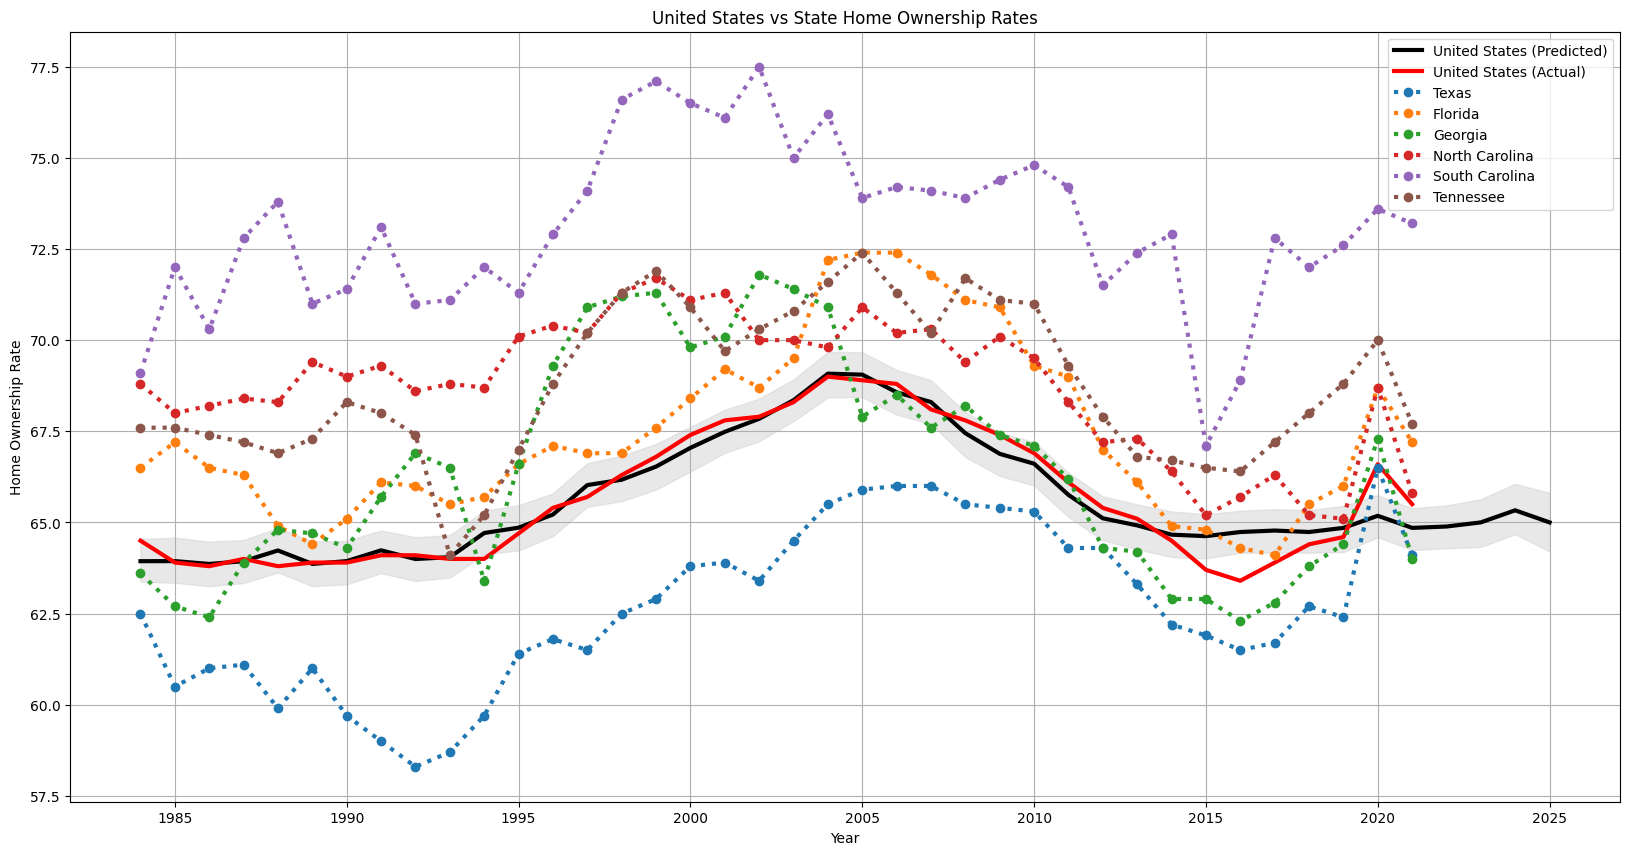

In [ ]:
plot(comparison_entity = 'United States', states_list = ['Texas', 'Florida', 'Georgia', 'North Carolina', 'South Carolina', 'Tennessee'], figsize = (20, 10))

### Set 4 - East Coast

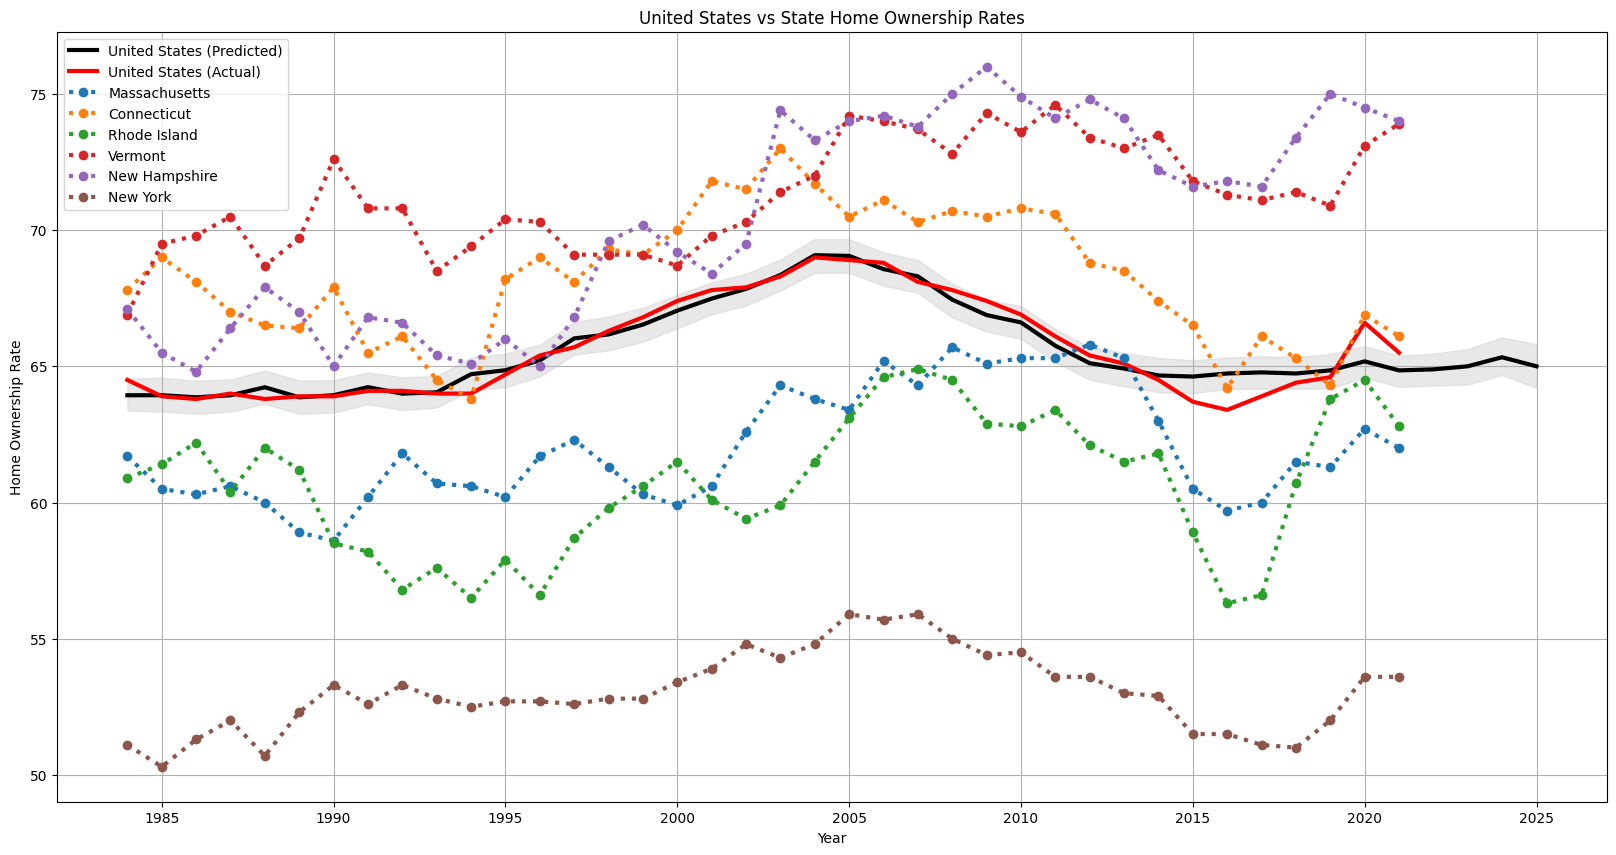

In [ ]:
plot(comparison_entity = 'United States', states_list = ['Massachusetts', 'Connecticut', 'Rhode Island', 'Vermont', 'New Hampshire', 'New York'], figsize = (20, 10))

### Set 5 - Comparing New York (lowest homwownership rate state) with neighbouring states

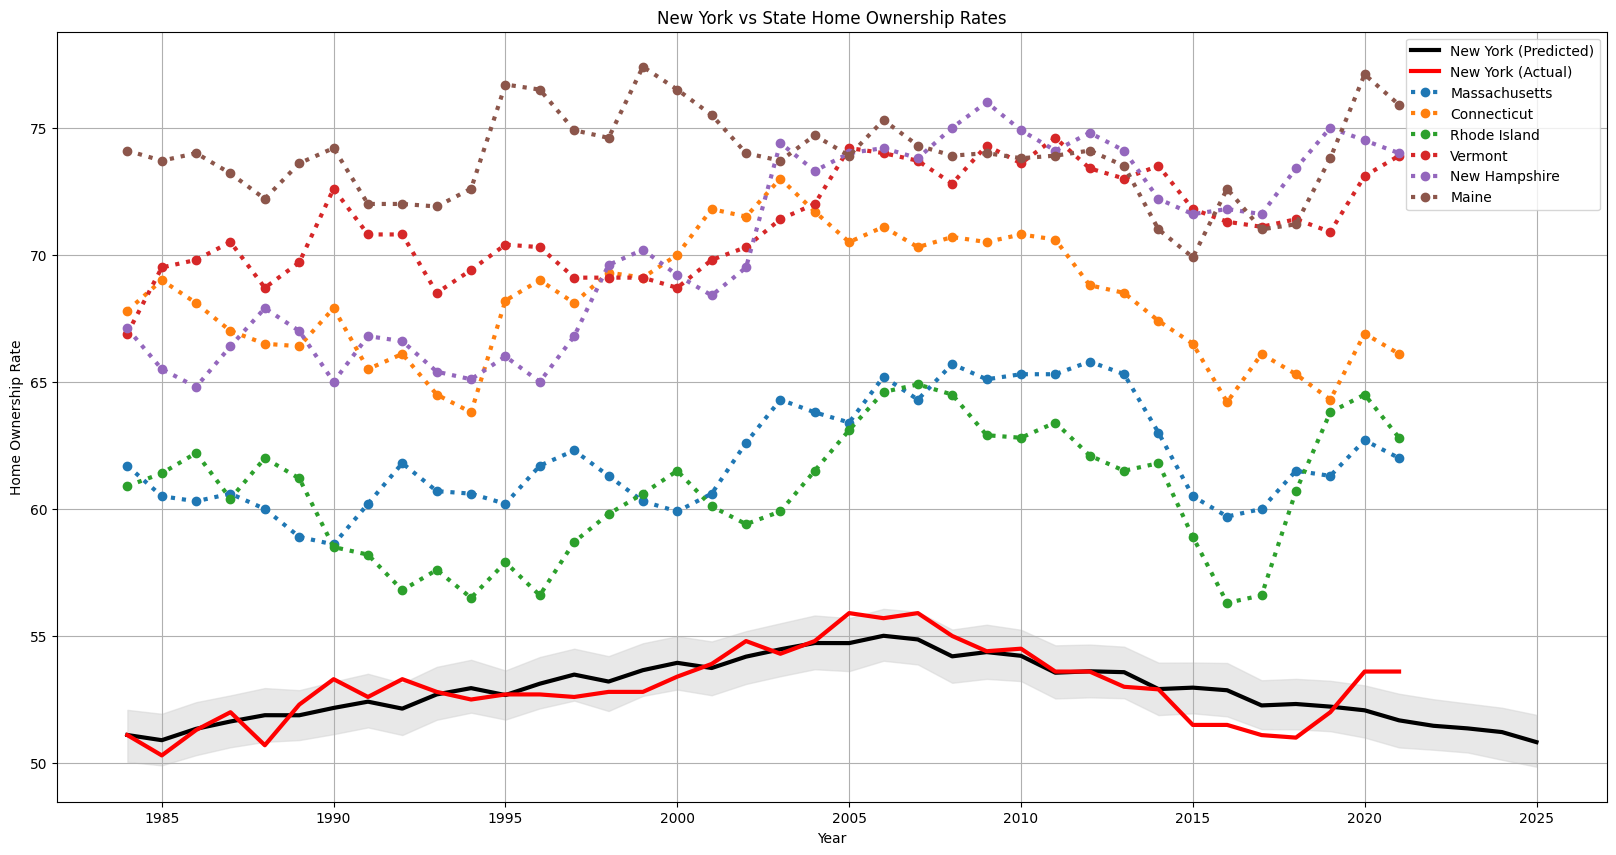

In [ ]:
plot(comparison_entity = 'New York', states_list = ['Massachusetts', 'Connecticut', 'Rhode Island', 'Vermont', 'New Hampshire', 'Maine'], figsize = (20, 10))

### Set 6 - Comparing West Virginia (highest homwownership rate state) with neighbouring states

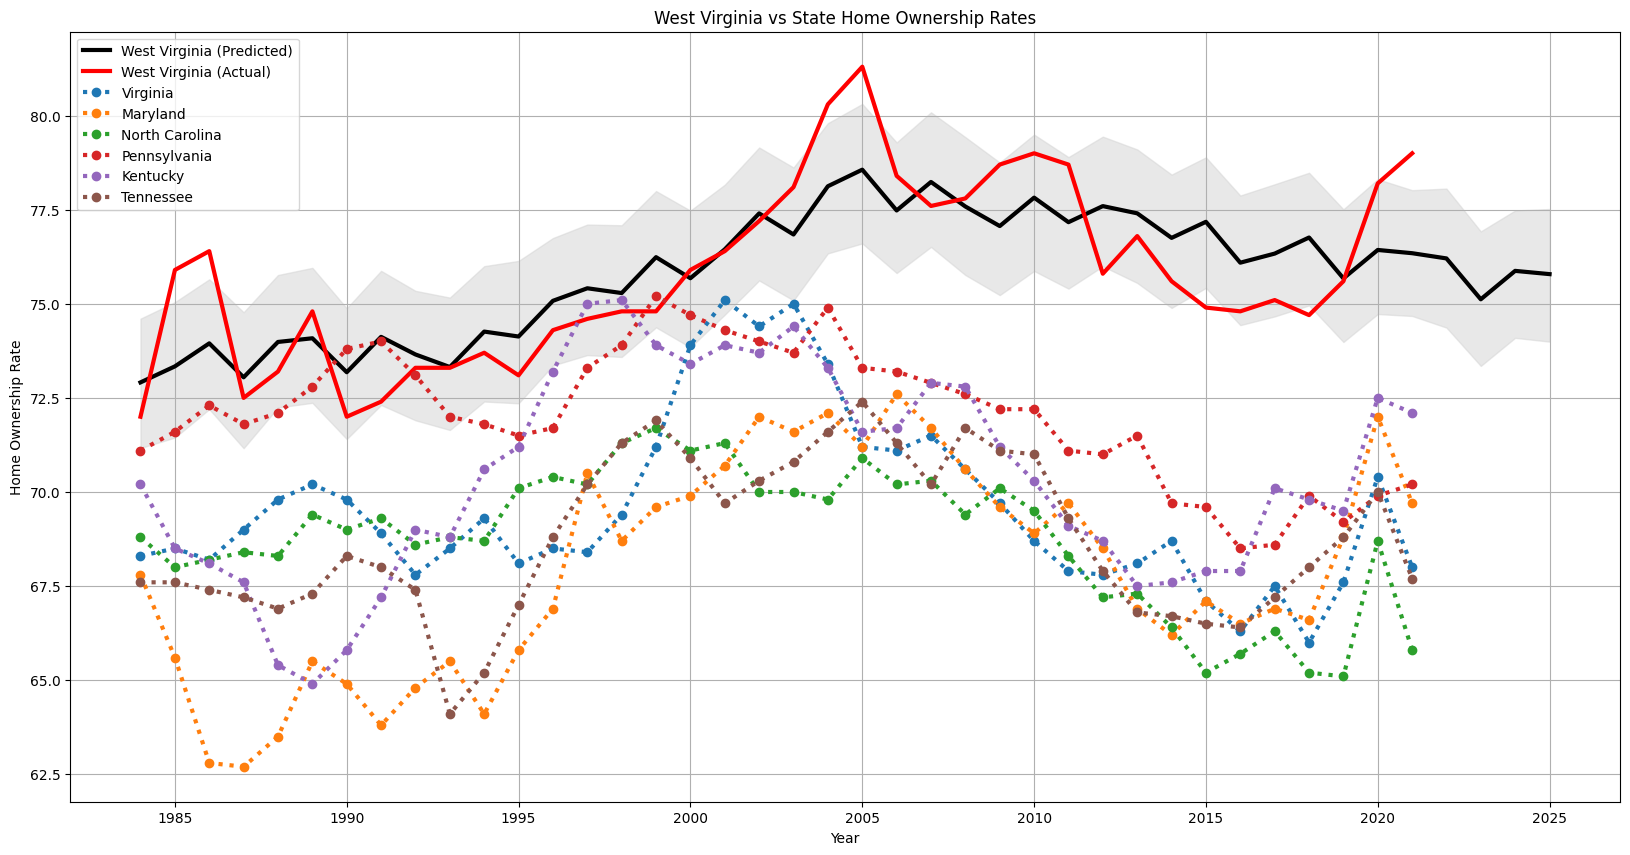

In [ ]:
plot(comparison_entity = 'West Virginia', states_list = ['Virginia', 'Maryland', 'North Carolina', 'Pennsylvania', 'Kentucky', 'Tennessee'], figsize = (20, 10))